# Los Angeles Earthquake Magnitude Classification

In this notebook we use the Los Angeles Earthquake Dataset to classify the magnitude of earthquakes on the Richter scale. The dataset contains information from January 1, 2012 to September 1, 2024 and was found on Kaggle.com.

We plan on classifying the data using three different models: logistic regression, support vector machine (SVM), and neural networks.

**Dataset :** [Los Angeles Earthquake dataset](https://www.kaggle.com/datasets/batuhankalem/los-angeles-earthquake-dataset/data)

## Preprocessing

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
from sklearn import datasets, linear_model
from sklearn import linear_model

# remove later (allows untruncated printing for ease of testing/debugging)
import sys

### Importing the data

In [78]:
# read the data and split the data into X and y
df = pd.read_csv('LosAngeles_Earthquake_Dataset-removed-0s.csv', delimiter=',')
feature_names = df[:0].columns


In [79]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22560 entries, 0 to 22559
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        22560 non-null  float64
 1   longitude                       22560 non-null  float64
 2   clustering_coefficient_30_days  22560 non-null  float64
 3   std_mag_30_days                 22560 non-null  float64
 4   rolling_mean_depth_30_days      22560 non-null  float64
 5   earthquakes_last_30_days        22560 non-null  int64  
 6   b_value                         22560 non-null  float64
 7   b_value_increment_i_i2          22560 non-null  float64
 8   b_value_increment_i2_i4         22560 non-null  float64
 9   b_value_increment_i4_i6         22560 non-null  float64
 10  b_value_increment_i6_i8         22560 non-null  float64
 11  b_value_increment_i8_i10        22560 non-null  float64
 12  max_mag_last_week               

,latitude,longitude,clustering_coefficient_30_days,std_mag_30_days,rolling_mean_depth_30_days,earthquakes_last_30_days,b_value,b_value_increment_i_i2,b_value_increment_i2_i4,b_value_increment_i4_i6,b_value_increment_i6_i8,b_value_increment_i8_i10,max_mag_last_week,eta,delta_M,elapsed_time,coefficient_of_variation,dE1_2,mag,class
count,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,2.256000e+04,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,2.256000e+04,22560.000000,2.256000e+04,22560.000000,22560.000000
mean,34.098200,-117.774406,0.866124,0.519413,9.604852,189.514229,0.566605,-0.000038,-4.229818e-05,-0.000040,0.000007,0.000038,2.011582,0.183598,-1.503916,8.577594e+05,1.178257,1.030400e+05,1.242844,2.766312
std,0.217868,0.557548,0.047046,0.068517,1.686750,169.383933,0.123334,0.036503,5.141092e-02,0.062720,0.072224,0.080384,0.596932,0.012151,0.774870,3.851648e+05,0.287685,2.551393e+05,0.533198,1.371892
min,33.191833,-119.320667,0.000000,0.000000,0.000000,0.000000,0.293007,-0.421920,-4.418203e-01,-0.450243,-0.460616,-0.455649,0.760000,0.159844,-4.692859,3.827500e+03,0.696293,1.229661e+04,-0.340000,1.000000
25%,34.001333,-118.135750,0.832248,0.469151,9.147655,122.000000,0.478912,-0.009485,-1.567671e-02,-0.021010,-0.026216,-0.031273,1.600000,0.174238,-1.970766,6.766993e+05,1.005825,2.896820e+04,0.880000,2.000000
50%,34.054167,-117.538417,0.857247,0.508384,9.985026,143.000000,0.555215,0.000124,-1.110000e-16,0.000139,0.000273,0.000264,1.910000,0.181130,-1.453130,8.875700e+05,1.120798,4.332824e+04,1.130000,3.000000
75%,34.207833,-117.313000,0.890450,0.560526,10.516310,178.000000,0.642068,0.009799,1.625191e-02,0.021854,0.027422,0.032245,2.320000,0.190707,-0.999805,1.095103e+06,1.272087,7.783336e+04,1.510000,4.000000
max,34.942167,-117.158333,0.992260,0.765815,15.568651,1227.000000,1.117587,0.420602,4.704251e-01,0.473283,0.474226,0.474092,5.496776,0.236607,1.157047,2.365254e+06,6.284059,3.337624e+06,5.496776,6.000000


##### Before we do any analysis on the data, we will first separate our target from the dataset so it doesn't get considered in principle component analysis.
We also reshape y to be a 2d array for future computation purposes.

In [80]:
data = df.to_numpy()
X = data[:,:19]
y = data[:,19]

y = y.reshape(-1,1) # reshape y to be a 2d array bc/ X was already 2d, but y was one column
print("X has shape: ", X.shape)
print("y has shape: ", y.shape)

X has shape:  (22560, 19)
y has shape:  (22560, 1)


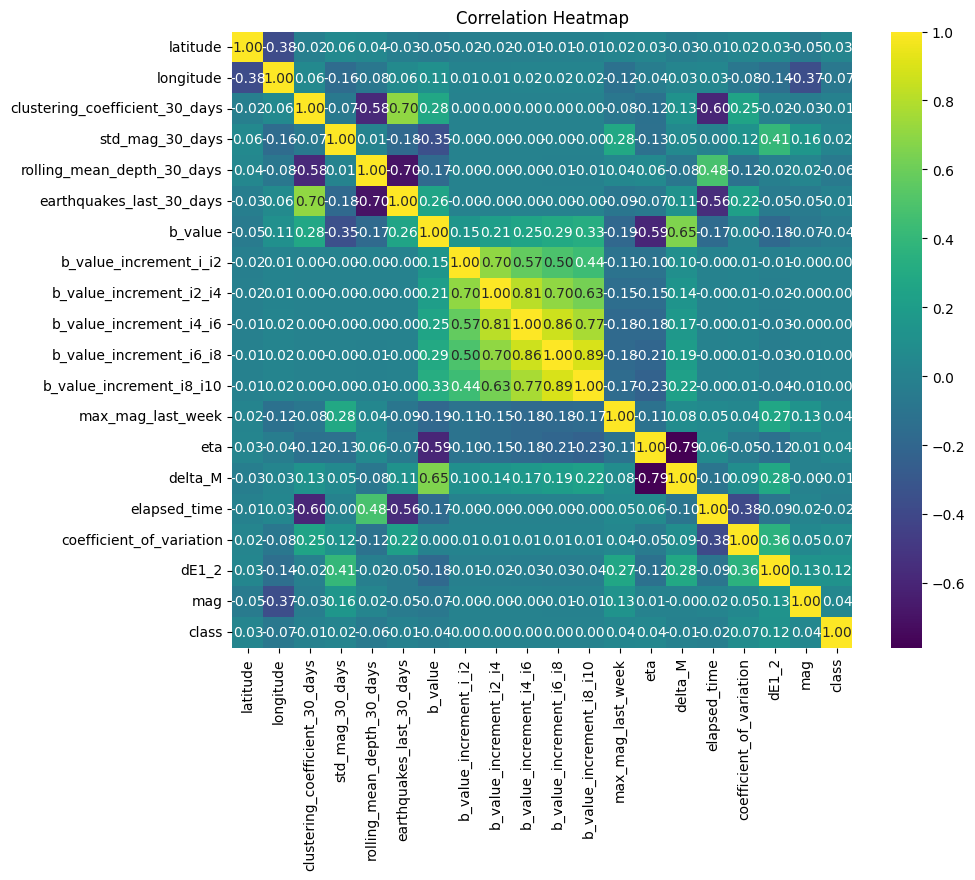

In [81]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='viridis', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##### We will then scale our data to ensure PCA does not favor certain features over others.

In [82]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

##### We will now do Principle Component Analysis (PCA)

In [83]:
pca = PCA()
data = pca.fit_transform(scaled_data)

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

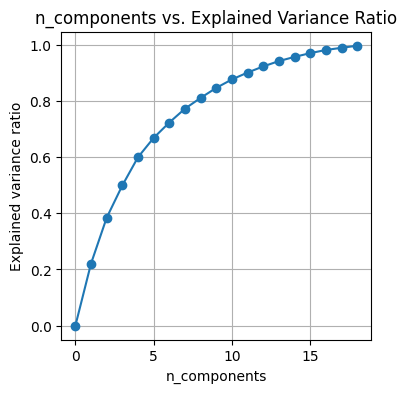

In [84]:
var_ratio = []
num_components = np.arange(data.shape[1])
for num in num_components:
    pca = PCA(n_components=num)
    pca.fit(scaled_data)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(4,4))
plt.grid(True)
plt.plot(num_components,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [85]:
pca = PCA(n_components=10)
pca.fit(scaled_data)
print("The explained variance ratio when reducing the number of components to 10 is: \n",np.sum(pca.explained_variance_ratio_))

The explained variance ratio when reducing the number of components to 10 is: 
 0.875881754439488


After conducting PCA on our dataset, we have come to the conclusion that PCA is not necessary for our purposes. We would like to be able to see how specific features influence our predictions, and reducing the number of features would mean that we lose the features and their names. 

The heatmap we plotted above also shows that there is little correlation between most of our features. 20 features is also a moderate amount of features, and may not need reduction. While reducing the number of features down to 10 changes the explained variance ratio to 0.876.  

While this does mean that we can confidently reduce the number of features in our dataset (to 13 or 14) without losing a large amount of information, we do not wish to lose the names of our features and are willing to deal with the consequences.

#### Splitting the data

Our dataset originally had 22,899 data points and 19 features, but after removing rows with missing values, we ended up with 22,561 data points. We will be using the magnitude feature as our target feature.

Given the size of the dataset, we believe that it is possible to retain the same significant patterns if we were to reduce the dataset's size by randomly sampling a section of it to use for the rest of the project. When taking our computation time/resources into account along with the fact that this is a school project, we did not find it necessary to use all 22561 data points in our testing, training, and validation.

We decided to only use about a quarter of the data points, or more specifically **5500 randomly chosen data samples**.

In [187]:
data = df.to_numpy()
np.random.shuffle(data)
data = data[:3000, :]
X = data[:,:19]
y = data[:,19]
y = y.reshape(-1,1)

Here we split the data into training and test sets. We use approximately 20% of the data for the test data and 20% for the validation data. The other 60% will be for training.

In [189]:

X_tr, X_test_val, y_tr, y_test_val = train_test_split(X, y, test_size=0.4, random_state=42)
print("X_tr (train) has shape: ", X_tr.shape)
print("y_tr (train) has shape: ", y_tr.shape, "\n")


# need to split the 40% test data into 20% test and 20% validation data
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)


# halve the X_test_val set into X_test and X_val
X_test = X_test_val[:(X_test_val.shape[0] // 2),:]
y_test = y_test_val[:(y_test_val.shape[0] // 2),:]
print("X_test has shape: ", X_test.shape)
print("y_test has shape: ", y_test.shape, "\n")

X_val = X_test_val[(X_test_val.shape[0] // 2):,:]
y_val = y_test_val[(y_test_val.shape[0] // 2):,:]
print("X_val has shape: ", X_val.shape)
print("y_val has shape: ", y_val.shape)


X_tr (train) has shape:  (1800, 19)
y_tr (train) has shape:  (1800, 1) 

X_test has shape:  (600, 19)
y_test has shape:  (600, 1) 

X_val has shape:  (600, 19)
y_val has shape:  (600, 1)


We should now analyze data patterns (do we need to do pca? we have a lot of features...)

First, we'll analyze whether the # of earthquakes in the last 30 days influences the magnitude

Then we can look at frequencies of longitude and latitude (together? how would we do two variables against one)

If possible, I'd like to look at longitude and latitude with magnitude

Perhaps delta m - Difference between the largest observed and expected magnitudes.

Also, b_value as a histogram

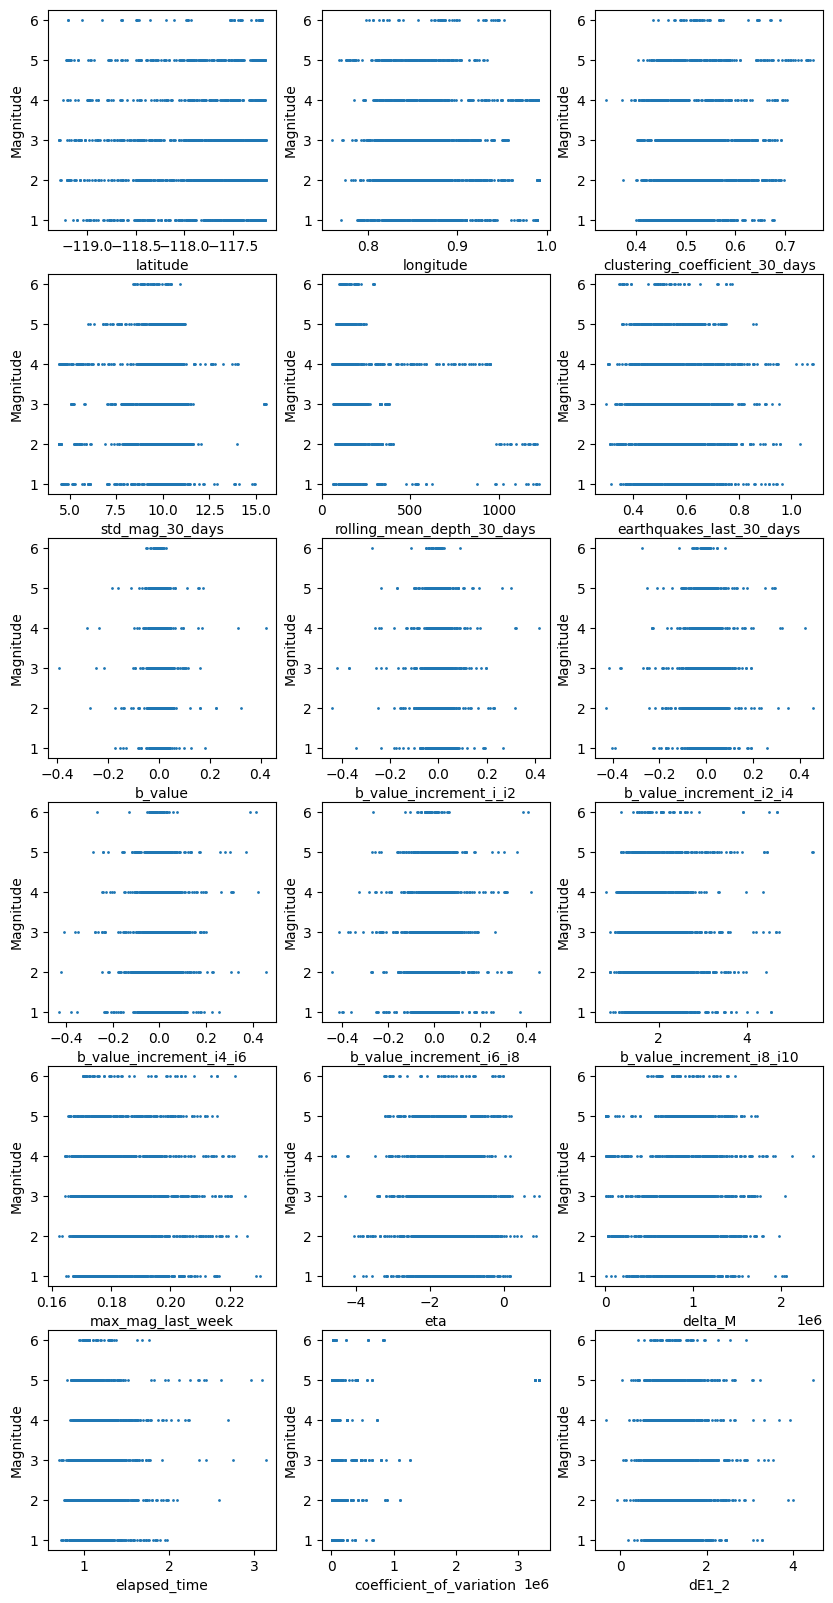

In [190]:
fig, axs = plt.subplots(6, 3, figsize=(10,20)) 
for i in range (0,6):
   for j in range (0,3):
       axs[i, j].scatter(X_tr[:,i*3+j+1],y_tr, s=1)
       axs[i, j].set_xlabel(feature_names[i*3+j])
for ax in axs.flat:
    ax.set( ylabel='Magnitude')

There doesn't appear to be much of a correlation between most of the features and magnitude, but there is a **potential** correlation with:
* the clustering coefficient calculated over the last 30 days
* the b value increment between i8 and i10
* the the max magnitude from last week

# Polynomial Transformation

In [191]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_transformation = PolynomialFeatures(degree = 2)

X_train_polynomial = polynomial_transformation.fit_transform(X_tr)
X_test_polynomial = polynomial_transformation.transform(X_test)

# Logistic Regression

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

#Create the logistic regression model
logreg = LogisticRegression(solver = 'saga', multi_class = 'multinomial', penalty = 'l1')

#transform the data to fit the model
X_train = scaler.fit_transform(X_tr)
X_test = scaler.fit_transform(X_test)
y_train = y_tr.ravel()

logreg.fit(X_train,y_train)

#predict the data and calculate the accuracy
yhat_train = logreg.predict(X_train)
yhat_test = logreg.predict(X_test)

train_score = logreg.score(X_train, y_tr)
test_score = logreg.score(X_test, y_test)

print("Test data accuracy: ", test_score)
print("Training data accuracy: ", train_score)

prec, recal, fscore, sup = precision_recall_fscore_support(y_test, yhat_test)

print('prec: ', prec)
print('recal: ', recal)
print('fscore: ', fscore)


Test data accuracy:  0.30333333333333334
Training data accuracy:  0.35388888888888886
prec:  [0.30120482 0.34980989 0.23369565 0.32692308 0.29411765 0.        ]
recal:  [0.18796992 0.57142857 0.33333333 0.19767442 0.07142857 0.        ]
fscore:  [0.23148148 0.43396226 0.27476038 0.24637681 0.11494253 0.        ]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

#Create the logistic regression model
logreg = LogisticRegression(solver = 'saga', multi_class = 'multinomial', penalty = 'l2')

logreg.fit(X_train,y_train)

#predict the data and calculate the accuracy
yhat_train = logreg.predict(X_train)
yhat_test = logreg.predict(X_test)

train_score = logreg.score(X_train, y_tr)
test_score = logreg.score(X_test, y_test)

print("Test data accuracy: ", test_score)
print("Training data accuracy: ", train_score)


prec, recal, fscore, sup = precision_recall_fscore_support(y_test, yhat_test)

print('prec: ', prec)
print('recal: ', recal)
print('fscore: ', fscore)


Test data accuracy:  0.30333333333333334
Training data accuracy:  0.3561111111111111
prec:  [0.30232558 0.34980989 0.23333333 0.32075472 0.29411765 0.        ]
recal:  [0.19548872 0.57142857 0.3255814  0.19767442 0.07142857 0.        ]
fscore:  [0.23744292 0.43396226 0.27184466 0.24460432 0.11494253 0.        ]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Logistic Regression with Polynomial Transformation

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

C_values = [0.001, 0.01, 0.1, 1.0, 10, 100]
Train_accuracy = []
Test_accuracy = []

for c in C_values:

    #Create the logistic regression model
    logreg = LogisticRegression(solver = 'saga', multi_class = 'multinomial', penalty = 'l1', C = c)

    #transform the data to fit the model
    X_train_polynomial = scaler.fit_transform(X_train_polynomial)
    X_test_polynomial = scaler.fit_transform(X_test_polynomial)
    y_train = y_tr.ravel()

    logreg.fit(X_train_polynomial,y_train)

    #predict the data and calculate the accuracy
    yhat_train = logreg.predict(X_test_polynomial)
    yhat_test = logreg.predict(X_test_polynomial)

    train_score = logreg.score(X_train_polynomial, y_tr)
    test_score = logreg.score(X_test_polynomial, y_test)

    Train_accuracy.append(train_score)
    Test_accuracy.append(test_score)

    # print("Test data accuracy: ", test_score)
    # print("Training data accuracy: ", train_score)

    prec, recal, fscore, sup = precision_recall_fscore_support(y_test, yhat_test)

    # print('prec: ', prec)
    # print('recal: ', recal)
    # print('fscore: ', fscore)
print("Train Accuracy: ", Train_accuracy)
print("Test Accuracy: ", Test_accuracy)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings

Train Accuracy:  [0.27111111111111114, 0.2827777777777778, 0.38222222222222224, 0.4116666666666667, 0.41888888888888887, 0.41833333333333333]
Test Accuracy:  [0.2683333333333333, 0.2733333333333333, 0.345, 0.3566666666666667, 0.35, 0.3466666666666667]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

#Create the logistic regression model
logreg = LogisticRegression(solver = 'saga', multi_class = 'multinomial', penalty = 'l2')

#transform the data to fit the model
X_train_polynomial = scaler.fit_transform(X_train_polynomial)
X_test_polynomial = scaler.fit_transform(X_test_polynomial)
y_train = y_tr.ravel()

logreg.fit(X_train_polynomial,y_train)

#predict the data and calculate the accuracy
yhat_train = logreg.predict(X_test_polynomial)
yhat_test = logreg.predict(X_test_polynomial)

train_score = logreg.score(X_train_polynomial, y_tr)
test_score = logreg.score(X_test_polynomial, y_test)

print("Test data accuracy: ", test_score)
print("Training data accuracy: ", train_score)

prec, recal, fscore, sup = precision_recall_fscore_support(y_test, yhat_test)

print('prec: ', prec)
print('recal: ', recal)
print('fscore: ', fscore)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Test data accuracy:  0.34833333333333333
Training data accuracy:  0.41888888888888887
prec:  [0.36752137 0.36178862 0.28994083 0.44       0.4        0.        ]
recal:  [0.32330827 0.55279503 0.37984496 0.25581395 0.08571429 0.        ]
fscore:  [0.344      0.43734644 0.32885906 0.32352941 0.14117647 0.        ]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Neural Networks

The first step to create a neural network model is to adjust our y data. Since we are classifying each earthquake on a scale of 1 to 6 we need to adjust our data to one-hot-encode the y values.

### One-Hot Encoding y

In [214]:
y_tr = y_tr.astype(int)
y_encoded_training = np.zeros((len(y_tr),7))
for i in range(len(y_tr)):
    y_encoded_training[i, y_tr[i]] = 1

y_test = y_test.astype(int)
y_encoded_test = np.zeros((len(y_test),7))
for i in range(len(y_test)):
    y_encoded_test[i, y_test[i]] = 1


### Neural Network with 1 hidden layer

In [249]:
import setuptools.dist
from tensorflow import keras
from keras import layers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu"))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_train, y_encoded_training), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_train, y_encoded_training)
print(f"Training Data Accuracy: {test_accuracy:.4f}")


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2294 - loss: 1.8605 - val_accuracy: 0.2956 - val_loss: 1.6629
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3145 - loss: 1.6390 - val_accuracy: 0.3050 - val_loss: 1.6002
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3337 - loss: 1.5767 - val_accuracy: 0.3383 - val_loss: 1.5672
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3202 - loss: 1.5705 - val_accuracy: 0.3406 - val_loss: 1.5447
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3259 - loss: 1.5619 - val_accuracy: 0.3539 - val_loss: 1.5247
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3483 - loss: 1.5247 - val_accuracy: 0.3678 - val_loss: 1.5077
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3944 - loss: 1.5039 - val_accuracy: 0.3783 - val_loss: 1.4906
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3641 - loss: 1.5038 - val_accuracy: 0.3878 - val_loss:

In [248]:
import setuptools.dist
from tensorflow import keras
from keras import layers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu"))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_test, y_encoded_test), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_encoded_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1730 - loss: 1.9482 - val_accuracy: 0.2567 - val_loss: 1.7175
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2820 - loss: 1.6732 - val_accuracy: 0.2950 - val_loss: 1.6651
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.3200 - loss: 1.5952 - val_accuracy: 0.2983 - val_loss: 1.6473
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.3406 - loss: 1.5527 - val_accuracy: 0.2933 - val_loss: 1.6327
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.3388 - loss: 1.5524 - val_accuracy: 0.3017 - val_loss: 1.6193
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.3585 - loss: 1.5337 - val_accuracy: 0.3200 - val_loss: 1.6152
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.3832 - loss: 1.5183 - val_accuracy: 0.3200 - val_loss: 1.6046
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.3753 - loss: 1.4984 - val_accuracy: 0.3200

### Neural network with two hidden layers

In [268]:
import setuptools.dist
from tensorflow import keras
from keras import layers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu"))
model.add(layers.Dense(80,activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_train, y_encoded_training), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_train, y_encoded_training)
print(f"Training Data Accuracy: {test_accuracy:.4f}")


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2504 - loss: 1.8211 - val_accuracy: 0.3044 - val_loss: 1.6299
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3099 - loss: 1.6116 - val_accuracy: 0.3389 - val_loss: 1.5770
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3322 - loss: 1.5900 - val_accuracy: 0.3483 - val_loss: 1.5437
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3602 - loss: 1.5302 - val_accuracy: 0.3756 - val_loss: 1.5081
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3641 - loss: 1.4825 - val_accuracy: 0.3756 - val_loss: 1.4911
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3814 - loss: 1.5049 - val_accuracy: 0.4006 - val_loss: 1.4617
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4041 - loss: 1.4635 - val_accuracy: 0.4094 - val_loss: 1.4375
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4176 - loss: 1.4266 - val_accuracy: 0.4078 - val_loss:

In [252]:
import setuptools.dist
from tensorflow import keras
from keras import layers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu"))
model.add(layers.Dense(80,activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_test, y_encoded_test), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_encoded_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2582 - loss: 1.8242 - val_accuracy: 0.2683 - val_loss: 1.6915
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3045 - loss: 1.6156 - val_accuracy: 0.3150 - val_loss: 1.6440
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.3284 - loss: 1.5329 - val_accuracy: 0.3267 - val_loss: 1.6114
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.3423 - loss: 1.5498 - val_accuracy: 0.3050 - val_loss: 1.6256
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.3480 - loss: 1.5111 - val_accuracy: 0.3083 - val_loss: 1.5996
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.3578 - loss: 1.4914 - val_accuracy: 0.3550 - val_loss: 1.5776
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4035 - loss: 1.4509 - val_accuracy: 0.3167 - val_loss: 1.5845
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.3763 - loss: 1.4408 - val_accuracy: 0.3617 -

### Neural network with 3 hidden layers

In [267]:
import setuptools.dist
from tensorflow import keras
from keras import layers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu"))
model.add(layers.Dense(80,activation="relu"))
model.add(layers.Dense(80,activation="relu"))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_train, y_encoded_training), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_train, y_encoded_training)
print(f"Training Data Accuracy: {test_accuracy:.4f}")


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2198 - loss: 1.8159 - val_accuracy: 0.3072 - val_loss: 1.6263
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2962 - loss: 1.6372 - val_accuracy: 0.3533 - val_loss: 1.5645
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3175 - loss: 1.5766 - val_accuracy: 0.3544 - val_loss: 1.5216
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3211 - loss: 1.5300 - val_accuracy: 0.3861 - val_loss: 1.4885
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3837 - loss: 1.4791 - val_accuracy: 0.3900 - val_loss: 1.4536
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3974 - loss: 1.4562 - val_accuracy: 0.3994 - val_loss: 1.4275
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3976 - loss: 1.4462 - val_accuracy: 0.4133 - val_loss: 1.4011
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4020 - loss: 1.4061 - val_accuracy: 0.4639 - val_loss:

In [263]:
import setuptools.dist
from tensorflow import keras
from keras import layers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu"))
model.add(layers.Dense(80,activation="relu"))
model.add(layers.Dense(80,activation="relu"))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_test, y_encoded_test), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_encoded_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2314 - loss: 1.8063 - val_accuracy: 0.2567 - val_loss: 1.6787
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3164 - loss: 1.6124 - val_accuracy: 0.3233 - val_loss: 1.6356
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3249 - loss: 1.5848 - val_accuracy: 0.3183 - val_loss: 1.6304
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3384 - loss: 1.5424 - val_accuracy: 0.3133 - val_loss: 1.6110
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3555 - loss: 1.5199 - val_accuracy: 0.3217 - val_loss: 1.5992
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3792 - loss: 1.4558 - val_accuracy: 0.3283 - val_loss: 1.6003
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3987 - loss: 1.4468 - val_accuracy: 0.3650 - val_loss: 1.5777
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4095 - loss: 1.4429 - val_accuracy: 0.3367 - val_loss:

### Neural Network with 3 Hidden Layers with Regularization

Because a neural network with 3 hidden layers had the most accuracy, we will add three different regularization values for both L1 and L2 to observe whether or not it makes the model more accurate. The values will be: 

C_values = [0.001, 0.01, 0.1]

In [254]:
import setuptools.dist
from tensorflow import keras
from keras import layers, regularizers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu", kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(80,activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_test, y_encoded_test), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_encoded_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2427 - loss: 2.5650 - val_accuracy: 0.3017 - val_loss: 2.3713
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3312 - loss: 2.2890 - val_accuracy: 0.2883 - val_loss: 2.2408
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3292 - loss: 2.1587 - val_accuracy: 0.3133 - val_loss: 2.1315
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3310 - loss: 2.0775 - val_accuracy: 0.2967 - val_loss: 2.0852
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.3644 - loss: 1.9928 - val_accuracy: 0.3067 - val_loss: 2.0168
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.3790 - loss: 1.9332 - val_accuracy: 0.3283 - val_loss: 1.9668
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.3600 - loss: 1.8985 - val_accuracy: 0.2983 - val_loss: 1.9368
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.3719 - loss: 1.8684 - val_accuracy: 0.3150 - v

In [255]:
import setuptools.dist
from tensorflow import keras
from keras import layers, regularizers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu", kernel_regularizer=regularizers.l1(0.01)))
model.add(layers.Dense(80,activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_test, y_encoded_test), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_encoded_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2482 - loss: 9.0508 - val_accuracy: 0.2617 - val_loss: 6.4254
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2745 - loss: 5.7130 - val_accuracy: 0.2650 - val_loss: 3.9181
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2867 - loss: 3.4484 - val_accuracy: 0.2650 - val_loss: 2.4578
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2873 - loss: 2.2408 - val_accuracy: 0.2300 - val_loss: 1.9301
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.2465 - loss: 1.8643 - val_accuracy: 0.2683 - val_loss: 1.7714
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.2856 - loss: 1.7275 - val_accuracy: 0.2683 - val_loss: 1.7196
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2637 - loss: 1.6952 - val_accuracy: 0.2667 - val_loss: 1.6947
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.2844 - loss: 1.6574 - val_accuracy: 0.2700 - val

In [256]:
import setuptools.dist
from tensorflow import keras
from keras import layers, regularizers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu", kernel_regularizer=regularizers.l1(0.1)))
model.add(layers.Dense(80,activation='relu', kernel_regularizer=regularizers.l1(0.1)))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_test, y_encoded_test), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_encoded_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2313 - loss: 71.8453 - val_accuracy: 0.2783 - val_loss: 43.6515
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2826 - loss: 36.2842 - val_accuracy: 0.2683 - val_loss: 17.7209
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2734 - loss: 13.5810 - val_accuracy: 0.2683 - val_loss: 4.6019
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.2738 - loss: 3.4910 - val_accuracy: 0.2683 - val_loss: 1.9253
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3073 - loss: 1.7987 - val_accuracy: 0.2683 - val_loss: 1.7790
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.2556 - loss: 1.7580 - val_accuracy: 0.2683 - val_loss: 1.7734
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2749 - loss: 1.7371 - val_accuracy: 0.2683 - val_loss: 1.7692
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.2658 - loss: 1.7341 - val_accuracy: 0.2683 

In [260]:
import setuptools.dist
from tensorflow import keras
from keras import layers, regularizers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(80,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_test, y_encoded_test), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_encoded_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2443 - loss: 1.9191 - val_accuracy: 0.2833 - val_loss: 1.7838
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3077 - loss: 1.7341 - val_accuracy: 0.2683 - val_loss: 1.7381
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3266 - loss: 1.6771 - val_accuracy: 0.2850 - val_loss: 1.7241
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3340 - loss: 1.6626 - val_accuracy: 0.2667 - val_loss: 1.6896
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3708 - loss: 1.6086 - val_accuracy: 0.2933 - val_loss: 1.6731
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3841 - loss: 1.5878 - val_accuracy: 0.3233 - val_loss: 1.6746
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.3716 - loss: 1.5848 - val_accuracy: 0.3450 - val_loss: 1.6640
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.4257 - loss: 1.5176 - val_accuracy: 0.3450 - val_l

In [261]:
import setuptools.dist
from tensorflow import keras
from keras import layers, regularizers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(80,activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_test, y_encoded_test), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_encoded_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2543 - loss: 2.7962 - val_accuracy: 0.2667 - val_loss: 2.3917
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2834 - loss: 2.2874 - val_accuracy: 0.2667 - val_loss: 2.1218
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3199 - loss: 2.0213 - val_accuracy: 0.2633 - val_loss: 1.9783
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.3150 - loss: 1.8911 - val_accuracy: 0.2817 - val_loss: 1.8812
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3201 - loss: 1.7935 - val_accuracy: 0.2733 - val_loss: 1.8135
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3063 - loss: 1.7439 - val_accuracy: 0.2850 - val_loss: 1.7760
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3119 - loss: 1.6987 - val_accuracy: 0.2983 - val_loss: 1.7476
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3316 - loss: 1.6872 - val_accuracy: 0.2917 - val_los

In [262]:
import setuptools.dist
from tensorflow import keras
from keras import layers, regularizers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu", kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dense(80,activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_test, y_encoded_test), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_encoded_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1971 - loss: 11.1603 - val_accuracy: 0.2350 - val_loss: 6.4962
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2504 - loss: 5.5626 - val_accuracy: 0.2717 - val_loss: 3.5556
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2702 - loss: 3.1575 - val_accuracy: 0.2683 - val_loss: 2.3659
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.2811 - loss: 2.1893 - val_accuracy: 0.2683 - val_loss: 1.9192
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.2601 - loss: 1.8480 - val_accuracy: 0.2683 - val_loss: 1.7615
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.2767 - loss: 1.7101 - val_accuracy: 0.2683 - val_loss: 1.7036
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.2804 - loss: 1.6755 - val_accuracy: 0.2683 - val_loss: 1.6864
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2705 - loss: 1.6638 - val_accuracy: 0.2683 - 